In [ ]:
!pip install pydotplus

In [ ]:
!pip install graphviz

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image



In [5]:
df = pd.read_csv('./dt_encoded.csv')

In [23]:
df.columns

Index(['journey_month', 'journey_day', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrived_next_day', 'Duration_in_mins', 'price',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'destination_Banglore', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'source_Banglore', 'source_Chennai', 'source_Delhi', 'source_Kolkata',
       'source_Mumbai', '1 stop', '2 stops', '3 stops', '4 stops', 'non-stop',
       'departure_After noon', 'departure_early morning', 'departure_evening',
       'departure_late night', 'departure_morning', 'departure_night',
       'arrival_After noon', 'arrival_early morning', 'arrival_evening',
       'arrival_late night', 'arrival_morning', 'arrival_night', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'F

In [8]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state = 123)
# separate features and target
X_train = train.drop("price", axis = 1)
y_train = train[["price"]]

### Create Decision tree based on:
1- Departure
2- Destination 
3- airline

In [32]:
#create model object
dt_mod = DecisionTreeRegressor(max_depth=3)

dt_target_names = 'price'
dt_feature_names = ['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']


#fit/train model using 
dt_fit = dt_mod.fit(X_train[[str(s) for s in dt_feature_names]], y_train)



In [33]:
dt_fit.get_n_leaves()

7

In [42]:
tree.export_graphviz(dt_fit, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [11]:
tree.export_graphviz(dt_mod,
                     out_file="tree.dot",
                     feature_names = ['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai' ], 
                     class_names=['price'],
                     filled = True)

[Text(223.20000000000002, 190.26, 'source_Delhi <= 0.5\nmse = 22441092.045\nsamples = 7323\nvalue = 9039.892'),
 Text(167.4, 135.9, 'source_Mumbai <= 0.5\nmse = 25301985.318\nsamples = 4312\nvalue = 8054.385'),
 Text(111.60000000000001, 81.53999999999999, 'source_Chennai <= 0.5\nmse = 25037827.925\nsamples = 3812\nvalue = 8458.503'),
 Text(55.800000000000004, 27.180000000000007, 'mse = 25471418.796\nsamples = 3551\nvalue = 8725.919'),
 Text(167.4, 27.180000000000007, 'mse = 4928471.163\nsamples = 261\nvalue = 4820.199'),
 Text(223.20000000000002, 81.53999999999999, 'mse = 16578332.275\nsamples = 500\nvalue = 4973.394'),
 Text(279.0, 135.9, 'mse = 14961339.595\nsamples = 3011\nvalue = 10451.22')]

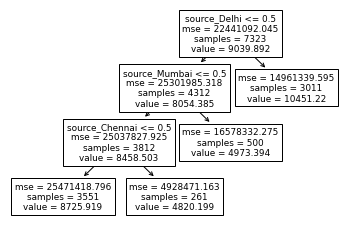

In [12]:
tree.plot_tree(dt_fit, feature_names = ['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai' ])

In [13]:
#create model object 
dt_mod = DecisionTreeRegressor(max_depth=3)
loss = 'neg_root_mean_squared_error'

kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai' ]], y_train, cv=kfold, scoring = loss)

dt_results_max3 = np.round(np.abs(results))

In [14]:
#create model object 
dt_mod = DecisionTreeRegressor()
loss = 'neg_root_mean_squared_error'

kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai' ]], y_train, cv=kfold, scoring = loss)

dt_results_no_limit = np.round(np.abs(results))

In [20]:
#create model object 
dt_mod = DecisionTreeRegressor()
loss = 'neg_root_mean_squared_error'

kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train, y_train, cv=kfold, scoring = loss)

dt_results_all_columns = np.round(np.abs(results))



In [21]:
dt_results_all_columns

array([2818., 2663., 2661., 3173., 2950.])